The project focuses on predicting survival outcomes for passengers of the Titanic disaster through data analysis. This historical tragedy serves as a basis for understanding human behavior in critical situations. By employing machine learning techniques, the project aims to develop a predictive model that sheds light on factors influencing survival. The insights gained extend beyond history, finding application in modern transportation industries, enhancing safety protocols, evacuation strategies, and risk assessment. The successful implementation of this model could lead to improved passenger safety and operational optimization across various sectors.

OSEMN framework will be adapted in the process of creating a machine learning model on the dataset.

In [1]:
# Importing the libraries
# Linear Algebra
import numpy as np

# Data Preprosessing
import pandas as pd

# Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
# Obtain the downloaded data from https://kaggle.com/c/titanic
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
# Preview the top 10 rows of the imported dataset
print(train_df.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

In [4]:
# Dataframe's basic information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Dataframe's Summary Statistic
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


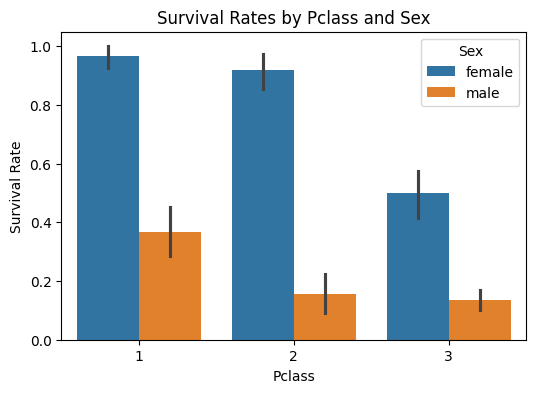

In [6]:
# Features Correlational Estimations:
# Pclass/Sex vs Survived
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_df)
plt.title('Survival Rates by Pclass and Sex')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.legend(title='Sex')
plt.show()

Text(0.5, 0.98, 'Survival Rates by Embarked and Pclass')

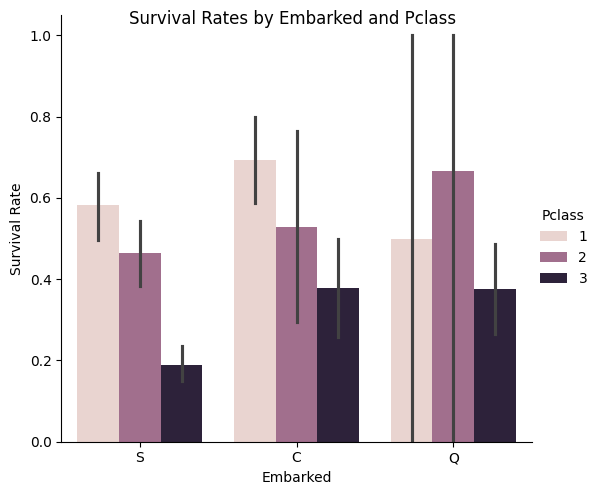

In [7]:
# Embarked/Pclass vs Survived
EmbarkedvsSurvived = sns.catplot(
    data = train_df,
    x = 'Embarked',
    y = 'Survived',
    hue = 'Pclass',
    kind = 'bar',
    aspect = 1.1
)

EmbarkedvsSurvived.set_axis_labels('Embarked', 'Survival Rate')
EmbarkedvsSurvived.fig.suptitle('Survival Rates by Embarked and Pclass')

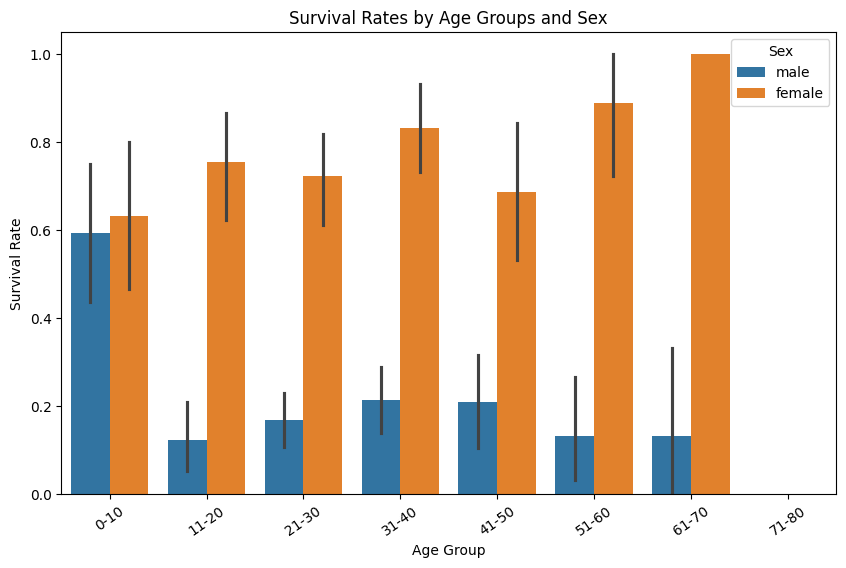

In [8]:
# Define Age Groups for Visualization
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Categorize passengers into the Age Groups
train_df['AgeGroup'] = pd.cut(train_df['Age'], 
                              bins = age_bins,
                              labels = age_labels,
                              right = False)

# Barplot for AgeGroup/Sex vs Survived
plt.figure(figsize=(10, 6))
sns.barplot(x = 'AgeGroup',
            y = 'Survived',
            hue = 'Sex',
            data = train_df)
plt.title('Survival Rates by Age Groups and Sex')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.legend(title = 'Sex')
plt.xticks(rotation = 35)
plt.show()

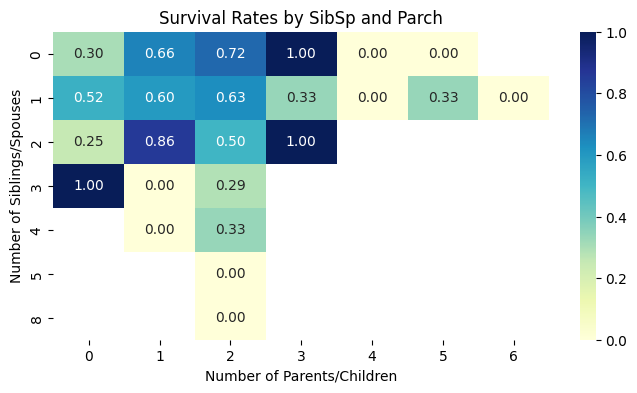

In [9]:
SibSpParchSurvivalR = train_df.groupby(['SibSp', 'Parch']) ['Survived'].mean().unstack()

# Heatmap for SibSp/Parch vs Survived
plt.figure(figsize = (8, 4))
sns.heatmap(SibSpParchSurvivalR, 
            annot = True,
            cmap = 'YlGnBu',
            fmt = '.2f')
plt.title('Survival Rates by SibSp and Parch')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Number of Siblings/Spouses')
plt.show()

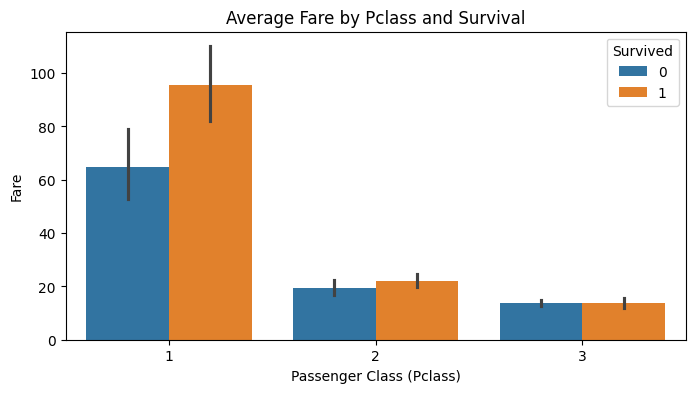

In [10]:
# Barchart to show the Fare/Pclass vs Survived
plt.figure(figsize = (8, 4))
sns.barplot(data = train_df,
            x = 'Pclass',
            y = 'Fare',
            hue = 'Survived')
plt.title('Average Fare by Pclass and Survival')
plt.xlabel('Passenger Class (Pclass)')
plt.legend(title = 'Survived')
plt.show()

In [11]:
# Preview the dataset again
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeGroup     713 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.9+ KB


In [12]:
# Datatype Conversion : Fare
data = [train_df, test_df]

for dataset in data:
    # Convert all missing value to '0'
    dataset['Fare'] = dataset['Fare'].fillna(0)

    # Convert all float.64 to int.64
    dataset['Fare'] = dataset['Fare'].astype(int)

# Previewing the first 5 rows of Fare
print(train_df['Fare'].head(5))

0     7
1    71
2     7
3    53
4     8
Name: Fare, dtype: int64


In [13]:
# Datatype conversion : Sex
# Required library for data concersion
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder Object
label_encoder = LabelEncoder()

# Fit and transform 'Sex' feature in both dataframes
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
test_df['Sex'] = label_encoder.transform(test_df['Sex'])

# Previewing the first 5 rows of Sex
print(train_df['Sex'].head(5))

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [14]:
# Datatype conversion : Embarked
# Dictionary for Embarked
ports = {"S" : 0, "C" : 1, "Q" : 2}
data = [train_df, test_df]

for dataset in data:
    # Assigning Embarked to their corresponding variables
    dataset['Embarked'] = dataset['Embarked'].map(ports)

# Previewing the first 10 rows of Embarked
print(train_df['Embarked'].head(10))

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
5    2.0
6    0.0
7    0.0
8    0.0
9    1.0
Name: Embarked, dtype: float64


In [15]:
# Dataframe after the DataType Conversion
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    int64   
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    float64 
 12  AgeGroup     713 non-null    category
dtypes: category(1), float64(2), int64(7), object(3)
memory usage: 84.9+ KB


In [16]:
# Featurs Dropping
# Removal of Cabin from Train.csv and Test.csv
train_df = train_df.drop(['Cabin'], axis = 1)
test_df = test_df.drop(['Cabin'], axis = 1)

In [17]:
# Removal of PassengerId from Train.csv and Test.csv
train_df = train_df.drop(['PassengerId'], axis = 1)
test_df = test_df.drop(['PassengerId'], axis = 1)

In [18]:
# Removal of Ticket from Train.csv and Test.csv
train_df = train_df.drop(['Ticket'], axis = 1)
test_df = test_df.drop(['Ticket'], axis = 1)

In [19]:
# DataFrame after the Features Dropping
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    int64   
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    int64   
 8   Embarked  889 non-null    float64 
 9   AgeGroup  713 non-null    category
dtypes: category(1), float64(2), int64(6), object(1)
memory usage: 64.0+ KB


In [20]:
# Summary of NaN value in the Dataset
# Total Counts of the missing value in the Dataset
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100

# Percentage of the missing value in the dataset in descending order
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# Creating a table to Concatenate both created Variables
missing_data =  pd.concat([total, percent_2],
                          axis = 1,
                          keys = ['Total NaN Counts', 'Percentage %'])

# Preview of the top 5 missing values in descending order
missing_data.head(5)

,Total NaN Counts,Percentage %
AgeGroup,178,20.0
Age,177,19.9
Embarked,2,0.2
Survived,0,0.0
Pclass,0,0.0


In [21]:
# Data Imputation
data = [train_df, test_df]

# Mean & Standard Deviation Imputation for Age
for dataset in data:
    mean = train_df['Age'].mean()
    std = train_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()

    # Assigning random integers to the NaN values in Age
    rand_age = np.random.randint(mean - std, mean + std, 
                                 size = is_null)
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice

    # Convert Age into Integers
    dataset['Age'] = train_df['Age'].astype(int)

# Check if any remaining NaN value in 'Age' Feature
print("Number of NaN values in 'Age' Column: ", train_df['Age'].isnull().sum())

Number of NaN values in 'Age' Column:  0


In [22]:
# Re-Categorize passengers into the Age Groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Re-assigning AgeGroup to all the new imputed Ages
data = [train_df, test_df]
for dataset in data:
    dataset['AgeGroup'] = pd.cut(dataset['Age'], 
                                 bins = age_bins,
                                 labels = age_labels,
                                 right = False)
    
# Check if any remaining NaN value in 'AgeGroup' Feature
print("Number of NaN values in 'AgeGroup' column:", train_df['AgeGroup'].isnull().sum())

Number of NaN values in 'AgeGroup' column: 0


In [23]:
# Display the AgeGroup in Category
train_df['AgeGroup'].value_counts()

AgeGroup
21-30    279
31-40    238
11-20    127
41-50    111
0-10      62
51-60     48
61-70     19
71-80      6
81-90      1
Name: count, dtype: int64

In [24]:
# Converting the AgeGroup to Integer to represent the attribute to the column
data = [train_df, test_df]
for dataset in data:
    dataset['AgeGroup'] = dataset['AgeGroup'].cat.codes

# Previewing the new AgeGroup
train_df['AgeGroup'].value_counts()

AgeGroup
2    279
3    238
1    127
4    111
0     62
5     48
6     19
7      6
8      1
Name: count, dtype: int64

In [25]:
# Mode Imputation for Embarked
# Statistical Summary for Embarked to determine the Mode
train_df['Embarked'].describe()

count    889.000000
mean       0.362205
std        0.636157
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

In [26]:
# Replacing '0' to the Missing value
common_value = 0
data = [train_df, test_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

for dataset in data:
    # Final conversion of DataType in Embarked to integers
    dataset['Embarked'] = dataset['Embarked'].astype(int)

# Check if any remaining NaN value in 'Embarked' Feature
print("Number of NaN values in 'Embarked' column:", train_df['Embarked'].isnull().sum())

Number of NaN values in 'Embarked' column: 0


In [27]:
# DataFrame after the conversion
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Name      891 non-null    object
 3   Sex       891 non-null    int64 
 4   Age       891 non-null    int64 
 5   SibSp     891 non-null    int64 
 6   Parch     891 non-null    int64 
 7   Fare      891 non-null    int64 
 8   Embarked  891 non-null    int64 
 9   AgeGroup  891 non-null    int8  
dtypes: int64(8), int8(1), object(1)
memory usage: 63.6+ KB


In [28]:
# Feature Engineering
# Title
# Dictionary for Names
titles = {"Mr" : 1, "Miss" : 2, "Mrs" : 3, "Master" : 4, "Rare" : 5}
data = [train_df, test_df]

for dataset in data:
    # Extract the first name as title
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand = False)
    
    # Normalizing rare titles to 'Rare'
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', ' Rev',
                                                 'Sir', 'Jonkheer', 'Dona'], 'Rare')
     
    # Replacing 'Mlle' with 'Miss'
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')

    # Replacing 'Ms' with 'Miss' 
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')

    # Replacing 'Mme' with 'Mrs'
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    # Replacing  Titles to Integers
    dataset['Title'] = dataset['Title'].map(titles)

    # Converting 'NaN' to '0' to show the distinction of empty value
    dataset['Title'] = dataset['Title'].fillna(0) 

# Previewing of new feature : Title
train_df['Title'].value_counts()

Title
1.0    517
2.0    185
3.0    126
4.0     40
5.0     17
0.0      6
Name: count, dtype: int64

In [29]:
# Dropping Name in the features
train_df = train_df.drop(['Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)

In [30]:
# Feature Engineering : AgeGroup
# Display the AgeGroup in Category
train_df['AgeGroup'].value_counts()

AgeGroup
2    279
3    238
1    127
4    111
0     62
5     48
6     19
7      6
8      1
Name: count, dtype: int64

In [31]:
# Feature Engineering : Solo_Traveller
data = [train_df, test_df]
for dataset in data:
    # Combination of SibSp(No. of siblings/spouses) and Parch(No. of parents/children)
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    
    # Not travel alone
    dataset.loc[dataset['relatives'] > 0, 'Solo_Traveller'] = 0

    # Travel alone
    dataset.loc[dataset['relatives'] == 0, 'Solo_Traveller'] = 1

    # Final conversion of new feature : Solo_Traveller
    train_df['Solo_Traveller'].value_counts()

# Preview of new feature : Solo_Traveller
train_df['Solo_Traveller'].value_counts()

Solo_Traveller
1.0    537
0.0    354
Name: count, dtype: int64

In [32]:
# Perform qcut on the 'Fare' Feature
# New feature 'FareCategories' to categorize fare
train_df['FareCategories'] = pd.qcut(train_df['Fare'], 
                                     q=6)

# Display the 'FareCategories' in an ascending order
fare_counts = train_df['FareCategories'].value_counts().sort_index()
print(fare_counts)

FareCategories
(-0.001, 7.0]    241
(7.0, 8.0]        70
(8.0, 14.0]      146
(14.0, 26.0]     165
(26.0, 52.0]     123
(52.0, 512.0]    146
Name: count, dtype: int64


In [33]:
data = [train_df, test_df]

# Categorizing the Fare according to FareCategories
for dataset in data:
    dataset.loc[dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 9), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Preview of new 'Fare'
train_df['Fare'].value_counts()

Fare
0    241
3    165
5    146
4    123
2    121
1     95
Name: count, dtype: int64

In [34]:
# Dropping the 'FareCategories' 
train_df = train_df.drop(['FareCategories'], axis=1)

In [35]:
data = [train_df, test_df]

# Computing Individual Cost
for dataset in data:
    dataset['Individual_Cost'] = dataset['Fare'] / (dataset['relatives'] + 1 )

    # Converting Individual Cost to Integers
    dataset['Individual_Cost'] = dataset['Individual_Cost'].astype(int)

In [36]:
# DataFrame after Feature Engineering
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Survived         891 non-null    int64  
 1   Pclass           891 non-null    int64  
 2   Sex              891 non-null    int64  
 3   Age              891 non-null    int64  
 4   SibSp            891 non-null    int64  
 5   Parch            891 non-null    int64  
 6   Fare             891 non-null    int64  
 7   Embarked         891 non-null    int64  
 8   AgeGroup         891 non-null    int8   
 9   Title            891 non-null    float64
 10  relatives        891 non-null    int64  
 11  Solo_Traveller   891 non-null    float64
 12  Individual_Cost  891 non-null    int64  
dtypes: float64(2), int64(10), int8(1)
memory usage: 84.5 KB


In [37]:
# Dropping the Survived for X_train set
X_train = train_df.drop('Survived', axis = 1)

# Including the Survived for Y_train set
Y_train = train_df['Survived']

# Establishing the X_Test data
X_test = test_df

In [38]:
# Machine Learning Modeling
# K-Nearest Neighbour
# Importing Libraries
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier

# K-Parameter = 3
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, Y_train)

# Applying on Test Set
Y_pred = KNN.predict(X_test)

# Accuracy of KNN computed
acc_KNN = round(KNN.score(X_train, Y_train) * 100, 2)

In [39]:
# Machine Learning Modeling
# Logistic Regression
# Importing Libraries
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

# Increase the number of iterations to 1000 as Warning on the first round
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, Y_train)

# Applying on test set
Y_pred = LR.predict(X_test)

# Accuracy of LR computed
acc_LR = round(LR.score(X_train, Y_train) * 100, 2)

In [40]:
# Machine Learning Modeling
# Decision Tree
# Importing Library
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)

# Applying on test set
Y_pred = DT.predict(X_test)

# Accuracy of DT computed
acc_DT = round(DT.score(X_train, Y_train) * 100, 2)

In [41]:
# Machine Learning Modeling
# Random Forest
# Importing Library
from sklearn.ensemble import RandomForestClassifier

# n = 100 decision trees to be used in the RF ensemble
RF = RandomForestClassifier(n_estimators= 100)
RF.fit(X_train, Y_train)

# Applying on test set
Y_prediction = RF.predict(X_test)

# Accuracy of RF computed
RF.score(X_train, Y_train)
acc_RF = round(RF.score(X_train, Y_train) * 100, 2)

In [42]:
# Machine Learning Modeling
# Stochastic Gradient Descent (SGD)
# Importing Library
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

# Maximum number of iterations = 5 for optimization, algorithm will not stop when the consecutive iteration is smaller than 'to1'
SGD = linear_model.SGDClassifier(max_iter=5, 
                                 tol = None)

SGD.fit(X_train, Y_train)
Y_pred = SGD.predict(X_test)

#Accuracy of SGD computed
SGD.score(X_train, Y_train)
acc_SGD = round(SGD.score(X_train, Y_train) * 100, 2)

In [43]:
# Machine Learning Modeling
# Gaussian Naive Bayes
# Importing Library
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, Y_train)

# Applying on test set
Y_pred = GNB.predict(X_test)

# Accuracy of GNB computed
acc_GNB = round(GNB.score(X_train, Y_train) * 100, 2)

In [44]:
# Machine Learning Modeling
# Percepthron
# Importing Library
from sklearn import linear_model
from sklearn.linear_model import Perceptron

# Max no of iterations = 100 for optimization
PCT = Perceptron(max_iter= 100)
PCT.fit(X_train, Y_train)

# Applying on test set
Y_pred = PCT.predict(X_test)

#Accuracy of PCT computed
acc_PCT = round(PCT.score(X_train, Y_train) * 100, 2)

In [45]:
# Model Evaluation
# Accuracy
results = pd.DataFrame({
    # Computing the accuracy score into their respective Modelss
    'Model' : ['KNN', 'LogisticRegression', 'Decision Tree', 'Random Forest', 
               'Stochastic Gradient Decent', 'Naive Bayes', ' Perceptron'],

    'Score' : [acc_KNN, acc_LR, acc_DT, acc_RF, acc_SGD, acc_GNB, acc_PCT]
})

# Sorting the reuslt by their accuracy score descendingly 
result_df = results.sort_values(by = 'Score', ascending = False)
print(result_df)

                        Model  Score
2               Decision Tree  95.51
3               Random Forest  95.51
0                         KNN  86.76
1          LogisticRegression  81.93
5                 Naive Bayes  78.34
4  Stochastic Gradient Decent  77.44
6                  Perceptron  66.55


In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           891 non-null    int64  
 1   Sex              891 non-null    int64  
 2   Age              891 non-null    int64  
 3   SibSp            891 non-null    int64  
 4   Parch            891 non-null    int64  
 5   Fare             891 non-null    int64  
 6   Embarked         891 non-null    int64  
 7   AgeGroup         891 non-null    int8   
 8   Title            891 non-null    float64
 9   relatives        891 non-null    int64  
 10  Solo_Traveller   891 non-null    float64
 11  Individual_Cost  891 non-null    int64  
dtypes: float64(2), int64(9), int8(1)
memory usage: 77.6 KB


In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           418 non-null    int64  
 1   Sex              418 non-null    int64  
 2   Age              418 non-null    int64  
 3   SibSp            418 non-null    int64  
 4   Parch            418 non-null    int64  
 5   Fare             418 non-null    int64  
 6   Embarked         418 non-null    int64  
 7   AgeGroup         418 non-null    int8   
 8   Title            418 non-null    float64
 9   relatives        418 non-null    int64  
 10  Solo_Traveller   418 non-null    float64
 11  Individual_Cost  418 non-null    int64  
dtypes: float64(2), int64(9), int8(1)
memory usage: 36.5 KB


In [49]:
# Dropping the 'Solo_Traveller' 

data = [X_train, X_test]

for dataset in data:
    dataset.drop(['Solo_Traveller', 'Parch', 'SibSp'], axis = 1, inplace = True),

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Pclass           891 non-null    int64  
 1   Sex              891 non-null    int64  
 2   Age              891 non-null    int64  
 3   Fare             891 non-null    int64  
 4   Embarked         891 non-null    int64  
 5   AgeGroup         891 non-null    int8   
 6   Title            891 non-null    float64
 7   relatives        891 non-null    int64  
 8   Individual_Cost  891 non-null    int64  
dtypes: float64(1), int64(7), int8(1)
memory usage: 56.7 KB


In [52]:
# Random Forest is re-trained to compare the accuracy score
RF = RandomForestClassifier(n_estimators= 100,
                            oob_score= True)
RF.fit(X_train, Y_train)

# Applying on test set
Y_prediction = RF.predict(X_test)

RF.score(X_train, Y_train)

# Accuracy score is computed again
acc_RF = round(RF.score(X_train, Y_train) * 100, 2)
print('Old Accuracy Score = 95.51 %')
print('New Accuracy Score =', round(acc_RF, 2,), "%")

# OOB score computed
print("OOB Score = ", round(RF.oob_score_, 4)*100, "%")

Old Accuracy Score = 95.51 %
New Accuracy Score = 95.4 %
OOB Score =  79.35 %


In [56]:
# Hyperparameter Tuning
# Parameter provided
param_grid = {'criterion' : ['gini', 'entropy'],
              'min_samples_leaf' : [1, 5, 10, 25, 50, 70],
              'min_samples_split' : [2, 4, 10, 12, 16, 18, 25, 35],
              'n_estimators' : [100, 400, 700, 1000, 1500]}

# Importing Library for GridSearchcv
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(
    n_estimators= 100,
    max_features= 'sqrt',
    oob_score= True,
    random_state= 1,
    n_jobs= -1
)

# Estimating the best parameters for Random Forest
nRF = GridSearchCV(estimator=RF,
                   param_grid=param_grid,
                   n_jobs=-1)
nRF.fit(X_train, Y_train)

# Best hyperparameters for RF
RFbest_params = nRF.best_params_
print(RFbest_params)


{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1500}


In [58]:
# Random Forest Classifier is fitting with New HyperParameters
RF = RandomForestClassifier(criterion = 'entropy',
                            min_samples_leaf= 1,
                            min_samples_split= 10,
                            n_estimators= 1500,
                            max_features= 'sqrt',
                            oob_score= True,
                            random_state=1,
                            n_jobs= -1)

# Re-train the model
RF.fit(X_train, Y_train)
Y_prediction = RF.predict(X_test)

RF.score(X_train, Y_train)

# Accuracy Score is computed again
acc_RF = round(RF.score(X_train, Y_train)* 100, 2)
print('Old Accuracy Score = 95.40 %')
print('New Accuracy Score =', round(acc_RF, 2,), "%")

print('Old OOB Score = 79.35 %')
print("New OOB Score = ", round(RF.oob_score_, 4)*100, "%")

Old Accuracy Score = 95.40 %
New Accuracy Score = 89.11 %
Old OOB Score = 79.35 %
New OOB Score =  82.6 %


In [59]:
# Importing Library for Confusion Matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(RF, X_train, Y_train, cv= 3)

# Confusion Matrix Model Evaluation
confusion_matrix(Y_train, predictions)

array([[484,  65],
       [ 96, 246]])

In [61]:
# Importing Library for Accuracy
from sklearn.metrics import accuracy_score

# Computing Accuracy Score
print("Accuracy:", accuracy_score(Y_train, predictions))

Accuracy: 0.819304152637486


In [62]:
# Importing Library for Precision
from sklearn.metrics import precision_score

# Computing Precision Score
print("Precision:", precision_score(Y_train, predictions))

Precision: 0.7909967845659164


In [64]:
# Importing Library for Recall
from sklearn.metrics import recall_score

# Computing Recall Score
print("Recall:", recall_score(Y_train, predictions))

Recall: 0.7192982456140351


In [65]:
# Importing Library for F1_Score
from sklearn.metrics import f1_score

# Computing F1 Score
print("F1 Score:", f1_score(Y_train, predictions))

F1 Score: 0.7534456355283307
